# Baysean Methods for the Physical Sciences
## Example 6.3.1

In [48]:
from collections import namedtuple
from pprint import pprint

import matplotlib
import numpy as np
import spacepy.plot as spp
import pymc as mc

%matplotlib inline
matplotlib.rcParams['savefig.dpi']=100

In [49]:
Data = namedtuple('Data', ['obstot', 'obsbkg', 'nbox', 'C'])

In [50]:
obs = {2:Data(35, 269, 22, 41.49), 
      6:Data(156, 325, 52, 41.77), 
      9:Data(415, 3827, 10, 39.67)}
pprint(obs)

{2: Data(obstot=35, obsbkg=269, nbox=22, C=41.49),
 6: Data(obstot=156, obsbkg=325, nbox=52, C=41.77),
 9: Data(obstot=415, obsbkg=3827, nbox=10, C=39.67)}


In [55]:

nclus = mc.Uniform('nclus', 0, 1e7)
nbkg = mc.Uniform('nbkg', 1, 1e7)

@mc.deterministic(plot=False)
def log_nbkg(nbkg=nbkg):
    return np.log10(nbkg)
obsbkg = mc.Poisson('obsbkg',nbkg)
nbkgind = mc.Lognormal('nbkgind',mu=log_nbkg, tau=0.2**(-2))
obstot = mc.Poisson('obstot',nclus + nbkgind/obs[2].nbox, observed=True, value=obs[2].obstot)

@mc.deterministic(plot=True)
def lgLx(val=nclus, c=obs[2].C):
    return np.log10(val)/2.30258 + c


In [56]:
model = mc.MCMC((nclus, nbkg, log_nbkg, obsbkg, nbkgind, obstot, lgLx))

In [63]:
model.sample(1000000, burn=1000, burn_till_tuned=True, thin=40)

 [-----------------100%-----------------] 1005362 of 1004000 complete in 153.5 sec

Plotting lgLx


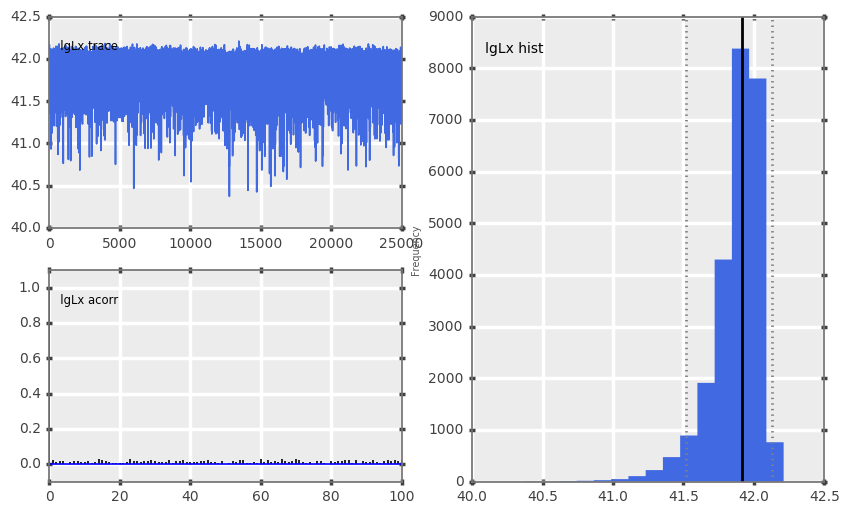

In [65]:
mc.Matplot.plot(lgLx)